# Assignment 1
To Predict the price of the Uber ride from a given pickup point to the agreed drop-off location

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import sklearn

In [33]:
df=pd.read_csv("./uber.csv")

In [34]:
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [35]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [36]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [37]:
df.dropna(inplace=True)

In [38]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [39]:
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000587,0.000230,-0.000341,0.000270,0.000271,0.002259
fare_amount,0.000587,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.000230,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.000341,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002259,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


<AxesSubplot:>

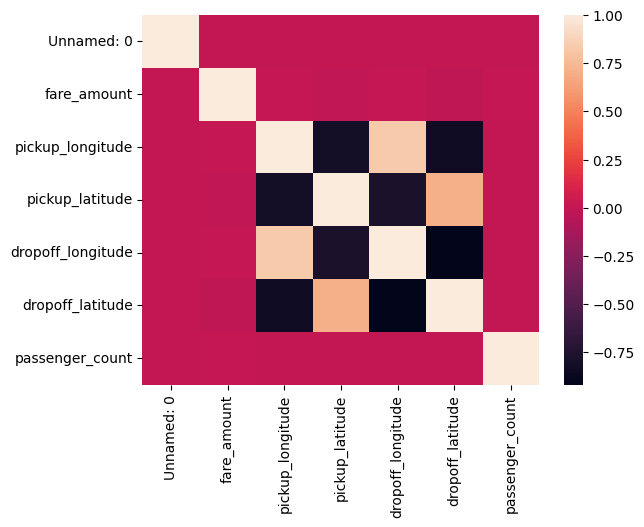

In [40]:
sns.heatmap(df.corr())

In [41]:
x=df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count']]

In [42]:
y=df['fare_amount']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8)

In [16]:
model=LinearRegression()

In [17]:
model.fit(X_train,Y_train)

LinearRegression()

In [18]:
y_pred=model.predict(X_test)

In [19]:
y_pred

array([11.29754738, 11.29698959, 11.37788216, ..., 11.29737983,
       11.29713038, 11.29749208])

In [20]:
r2_score=r2_score(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=(mean_squared_error(Y_test,y_pred)**0.5)
mae=mean_absolute_error(Y_test,y_pred)

In [21]:
print("r2_score",r2_score)
print("rmse",rmse)

r2_score 1.3909306442183578e-06
rmse 10.066381331842928


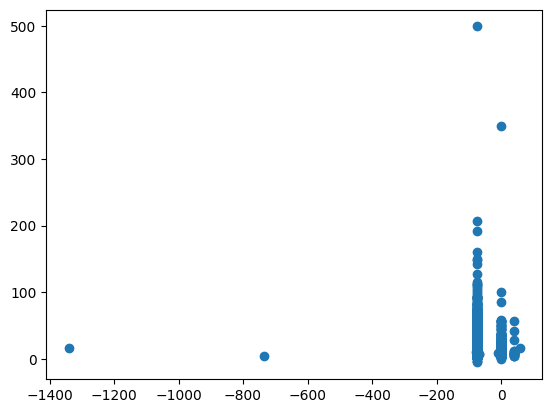

In [22]:
plt.scatter(X_test['pickup_longitude'],Y_test)

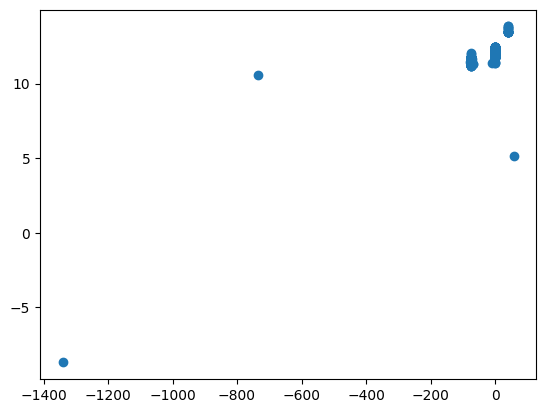

In [23]:
plt.scatter(X_test['pickup_longitude'],y_pred)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor(n_estimators=100)

In [26]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
y_pred1 = rf.predict(X_test)

In [28]:
y_pred1.shape

(40000,)

In [29]:
Y_test.shape

(40000,)

In [46]:

mse=mean_squared_error(Y_test,y_pred1)
rmse=(mean_squared_error(Y_test,y_pred1)**0.5)
mae=mean_absolute_error(Y_test,y_pred1)

In [31]:
print("r2_score",r2_score)
print("rmse",rmse)

r2_score 1.3909306442183578e-06
rmse 5.341396686135622


In [48]:
r2_score = r2_score(Y_test,y_pred)

TypeError: 'numpy.float64' object is not callable

In [49]:
r2_score(Y_test,y_pred1)

TypeError: 'numpy.float64' object is not callable

In [50]:
from sklearn import metrics

In [51]:
metrics.accuracy_score(Y_test,y_pred)

ValueError: continuous is not supported